In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto novo
Processing Record 2 of Set 1 | huilong
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | george town
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | kavaratti
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | san policarpo
Processing Record 14 of Set 1 | jalu
Processing Record 15 of Set 1 | riyadh
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | khatanga

Processing Record 34 of Set 4 | ituiutaba
Processing Record 35 of Set 4 | coahuayana
Processing Record 36 of Set 4 | avarua
Processing Record 37 of Set 4 | grindavik
Processing Record 38 of Set 4 | limpapa
Processing Record 39 of Set 4 | kampene
Processing Record 40 of Set 4 | aksu
Processing Record 41 of Set 4 | san cristobal
Processing Record 42 of Set 4 | guozhen
Processing Record 43 of Set 4 | kudahuvadhoo
Processing Record 44 of Set 4 | pringsewu
Processing Record 45 of Set 4 | kalmunai
Processing Record 46 of Set 4 | sur
Processing Record 47 of Set 4 | nove hrady
Processing Record 48 of Set 4 | esmeraldas
Processing Record 49 of Set 4 | taoyuan
Processing Record 50 of Set 4 | karpogory
Processing Record 1 of Set 5 | axim
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | chagda
City not found. Skipping...
Processing Record 4 of Set 5 | naze
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | cadillac
Processing Record 7 of Set 5 | ng

Processing Record 26 of Set 8 | chishtian mandi
Processing Record 27 of Set 8 | kedrovyy
Processing Record 28 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 29 of Set 8 | ossora
Processing Record 30 of Set 8 | payo
Processing Record 31 of Set 8 | melito di porto salvo
Processing Record 32 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 33 of Set 8 | mao
Processing Record 34 of Set 8 | kostomuksha
Processing Record 35 of Set 8 | choya
Processing Record 36 of Set 8 | marawi
Processing Record 37 of Set 8 | beloha
Processing Record 38 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 39 of Set 8 | gavle
Processing Record 40 of Set 8 | meadow lake
Processing Record 41 of Set 8 | lavrentiya
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | port augusta
Processing Record 44 of Set 8 | saint-augustin
Processing Record 45 of Set 8 | berdigestyakh
Processing Record 46 of Set 8 | golfito
Processing Record 47 of Se

Processing Record 13 of Set 12 | labuhan
Processing Record 14 of Set 12 | naranjal
Processing Record 15 of Set 12 | tabas
Processing Record 16 of Set 12 | garowe
Processing Record 17 of Set 12 | praia da vitoria
Processing Record 18 of Set 12 | ankazoabo
Processing Record 19 of Set 12 | guatire
Processing Record 20 of Set 12 | cam ranh
Processing Record 21 of Set 12 | asau
Processing Record 22 of Set 12 | sumkino
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | solnechnyy
Processing Record 25 of Set 12 | pizhma
Processing Record 26 of Set 12 | cayenne
Processing Record 27 of Set 12 | flinders
Processing Record 28 of Set 12 | shahreza
Processing Record 29 of Set 12 | port blair
Processing Record 30 of Set 12 | dalby
Processing Record 31 of Set 12 | leh
Processing Record 32 of Set 12 | fortuna foothills
Processing Record 33 of Set 12 | awbari
Processing Record 34 of Set 12 | khangah dogran
-----------------------------
Data Retrieval Complete      
------------

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Porto Novo,6.4965,2.6036,82.22,82,100,8.16,BJ,2022-04-27 01:42:20
1,Huilong,31.8111,121.6550,64.92,64,100,16.58,CN,2022-04-27 01:42:21
2,Dikson,73.5069,80.5464,13.03,90,93,9.13,RU,2022-04-27 01:42:21
3,Mataura,-46.1927,168.8643,55.47,89,85,3.78,NZ,2022-04-27 01:42:22
4,Bethel,41.3712,-73.4140,55.49,92,100,0.00,US,2022-04-27 01:42:22
5,Ushuaia,-54.8000,-68.3000,38.86,81,75,16.11,AR,2022-04-27 01:38:42
6,George Town,5.4112,100.3354,84.13,87,20,6.91,MY,2022-04-27 01:41:54
7,New Norfolk,-42.7826,147.0587,59.92,80,100,1.81,AU,2022-04-27 01:42:23
8,Kavaratti,10.5669,72.6420,84.94,72,10,4.70,IN,2022-04-27 01:42:23
9,Rikitea,-23.1203,-134.9692,77.88,71,100,20.92,PF,2022-04-27 01:42:24


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Novo,BJ,2022-04-27 01:42:20,6.4965,2.6036,82.22,82,100,8.16
1,Huilong,CN,2022-04-27 01:42:21,31.8111,121.6550,64.92,64,100,16.58
2,Dikson,RU,2022-04-27 01:42:21,73.5069,80.5464,13.03,90,93,9.13
3,Mataura,NZ,2022-04-27 01:42:22,-46.1927,168.8643,55.47,89,85,3.78
4,Bethel,US,2022-04-27 01:42:22,41.3712,-73.4140,55.49,92,100,0.00
5,Ushuaia,AR,2022-04-27 01:38:42,-54.8000,-68.3000,38.86,81,75,16.11
6,George Town,MY,2022-04-27 01:41:54,5.4112,100.3354,84.13,87,20,6.91
7,New Norfolk,AU,2022-04-27 01:42:23,-42.7826,147.0587,59.92,80,100,1.81
8,Kavaratti,IN,2022-04-27 01:42:23,10.5669,72.6420,84.94,72,10,4.70
9,Rikitea,PF,2022-04-27 01:42:24,-23.1203,-134.9692,77.88,71,100,20.92


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

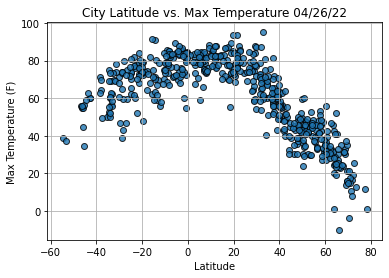

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

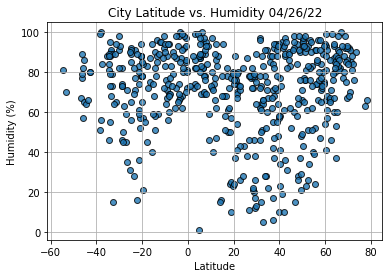

In [27]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

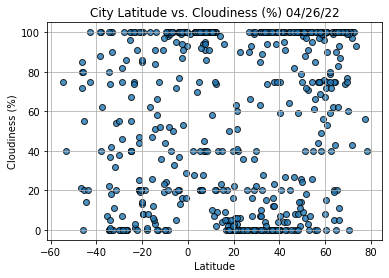

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

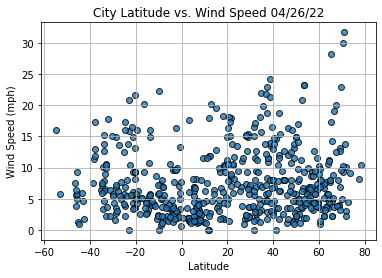

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                         Jalu
Country                        LY
Date          2022-04-27 01:42:25
Lat                       29.0331
Lng                       21.5482
Max Temp                    74.37
Humidity                       20
Cloudiness                     99
Wind Speed                  15.48
Name: 13, dtype: object

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Novo,BJ,2022-04-27 01:42:20,6.4965,2.6036,82.22,82,100,8.16
1,Huilong,CN,2022-04-27 01:42:21,31.8111,121.6550,64.92,64,100,16.58
2,Dikson,RU,2022-04-27 01:42:21,73.5069,80.5464,13.03,90,93,9.13
4,Bethel,US,2022-04-27 01:42:22,41.3712,-73.4140,55.49,92,100,0.00
6,George Town,MY,2022-04-27 01:41:54,5.4112,100.3354,84.13,87,20,6.91
...,...,...,...,...,...,...,...,...,...
530,Port Blair,IN,2022-04-27 01:57:04,11.6667,92.7500,82.44,89,75,0.00
532,Leh,IN,2022-04-27 01:57:05,34.1667,77.5833,40.24,52,2,1.21
533,Fortuna Foothills,US,2022-04-27 01:57:05,32.6578,-114.4119,95.05,5,0,12.66
534,Awbari,LY,2022-04-27 01:57:06,26.5921,12.7805,73.67,11,100,3.83


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

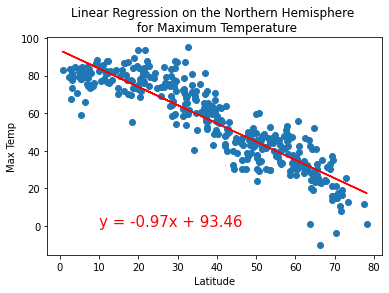

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

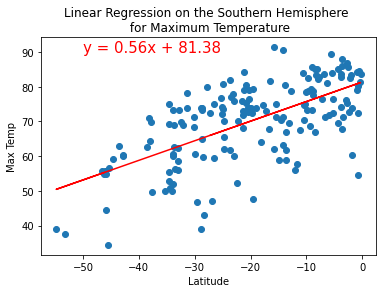

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

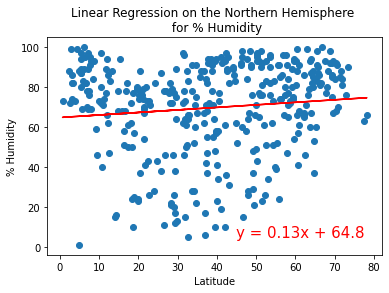

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,5))

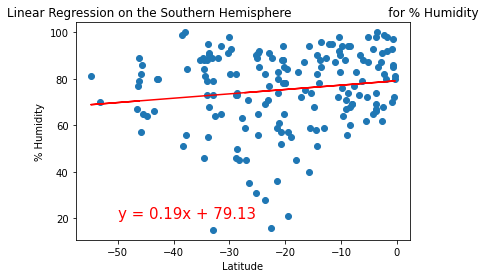

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

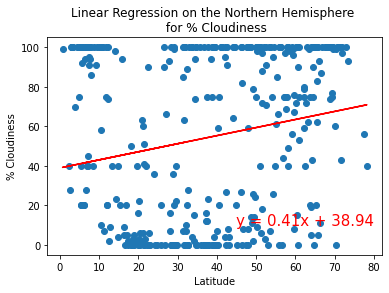

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

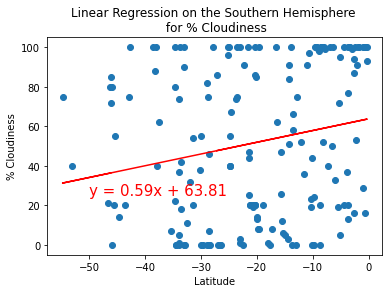

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,25))

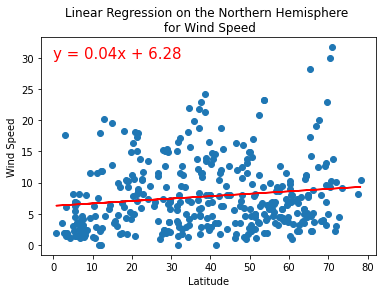

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

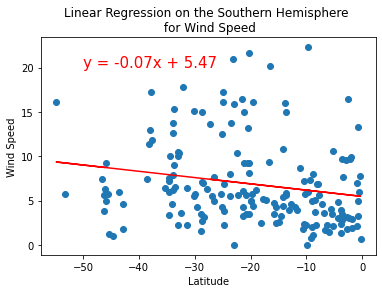

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))